In [1]:
#Didi week 6 practicum

# - Make a pandas dataframe for the Tropic of Orange metadata
# - For each file in that dataframe,
#    - Open that file
#    - Read it to a string
#    - Make a textblob of it
#    - Make a text_results dictionary (remember to include 'fn' as key)
#    - Add in the results dictionary:
#      - % of words which are nouns (tag starts with "N")
#      - % of words which are verbs (tag starts with "V")
#      - % of words which are adjectives (tag starts with "J")
#    - Store the results dictionaries in a list
#    - Make a results dataframe
#    - Merge that dataframe to the original metadata frame
#    - Make 3 boxplots of nouns/verbs/adjectives by narrator (using either pandas or Tableau)

Hypothesis: I associate Buzzworm, Arcangel, and Rafaela with lots of lists, so I expect their chapters to be heavy on nouns. Since Buzzworm has many short sentences, and almost all sentences require a verb, I expect him to be heavy on verbs as well. I think maybe Emi's chapters will have many adjectives since her chapters tend to be heavy on dialogue with various adjectives interspersed.

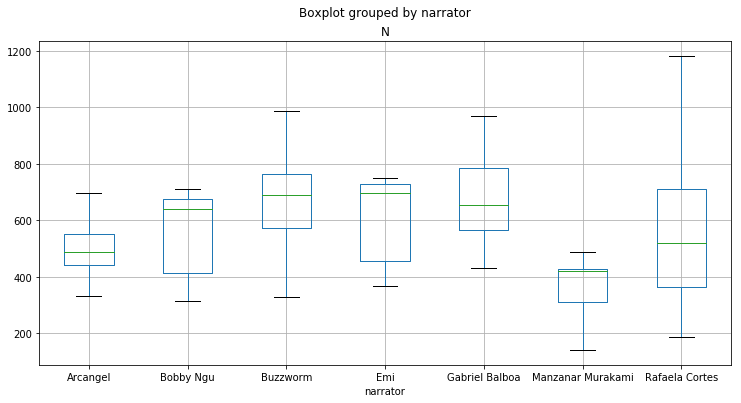

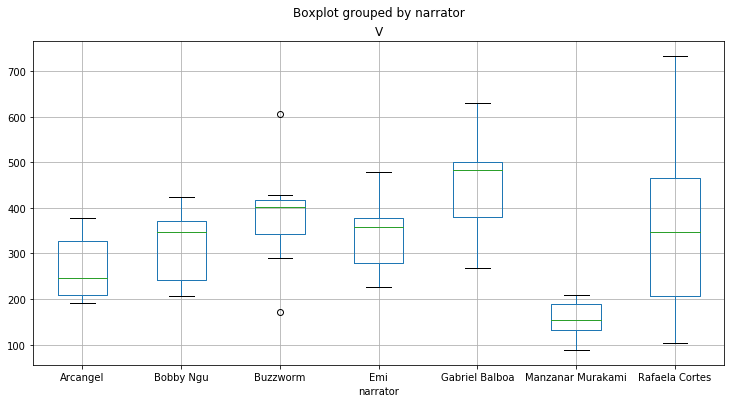

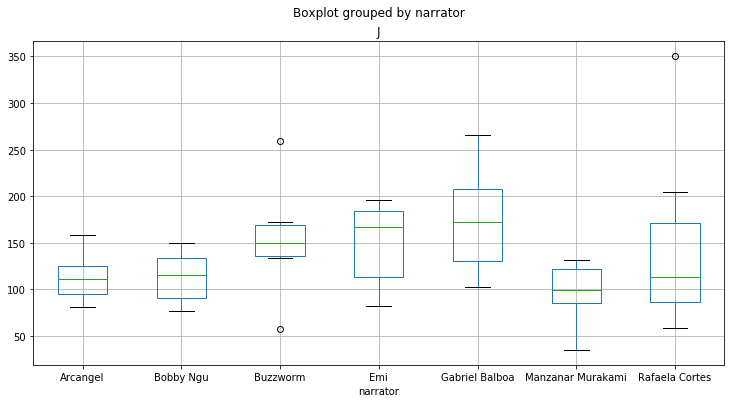

In [6]:
import pandas as pd
from textblob import TextBlob
import nltk,os

df=pd.read_excel('../corpora/tropic_of_orange/metadata.xls')
textfolder='../corpora/tropic_of_orange/texts'
from collections import Counter

results_list = []

for fn in df.fn:
    path=os.path.join(textfolder, fn)
    with open(path) as file:
        txt=file.read()
    txt_blob = TextBlob(txt)
    tags = txt_blob.tags
    
    text_results={}
    text_results['fn']=fn
    text_results['N']=0
    text_results['V']=0
    text_results['J']=0
    
    for tg in tags:
        prt = tg[1][:1]
        if(prt == 'N' or prt =='V' or prt=='J'):
            text_results[prt]+=1
    results_list.append(text_results)
    
df_results= pd.DataFrame(results_list)
df_all = df.merge(df_results,on='fn')
df_all.boxplot('N',by='narrator', figsize=(12,6))
df_all.boxplot('V',by='narrator', figsize=(12,6))
df_all.boxplot('J',by='narrator', figsize=(12,6))

Buzzworm has a lot of nouns and verbs as predicted, Emi has a lot of adjectives as well. But she also has a lot of nouns and verbs. Rafaela has a lot of nouns and verbs; there's a greater range between chapters for her. Arcangel consistently has a lot of nouns. But I think the data should be normalized, since the characters I have discussed (other than Emi) have shorter chapters compared to some others, notably Gabriel. I didn't discuss Gabriel in my hypothesis because I didn't have a clear impression of his style. 

The fact that Arcangel, Buzzworm, and Manzanar have relatively compact box plots means their part of speech numbers don't vary as much across chapters, so they probably have a more consistent style that causes me to think of them first when asked to make a hypothesis about part-of-speech distribution.